<a href="https://colab.research.google.com/github/BKirill/MLatFIAN2020_homework/blob/main/MLatFIAN2020_seminar02_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Consider the following toy dataset:

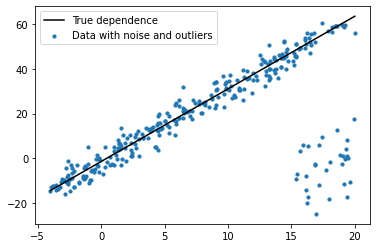

In [2]:
true_function = lambda x: 3.25 * x - 1.47
noize_function = lambda x: (
    np.random.normal(size=len(x)) * 4. +
    np.where(
        x < 15,
        0.,
        -60 + np.random.normal(size=len(x)) * 10
    ) * (np.random.uniform(size=len(x)) < 0.4).astype(int)
)
limits = (-4., 20.)

def generate_dataset(N=300):
  x = np.random.uniform(*limits, size=N)
  y = true_function(x) + noize_function(x)

  return x[:,None], y

X, y = generate_dataset()

x = np.linspace(*limits, 101)
plt.plot(x, true_function(x), c='black', label='True dependence')
plt.scatter(X, y, s=10, label='Data with noise and outliers')
plt.legend();

## Task 1

Implement a linear model $\hat y(x|w) = w_1\cdot x + w_0$ with MAE loss:
$$\text{MAE}(w) = \frac{1}{N}\sum_{i=1}^N\left|y_i - \hat y(x_i|w)\right|,$$
using gradient descent optimization in `numpy`.

*Hint: introduce a constant feature to account for the bias term to make the formulas simpler.*

Plot the learning curve and the final fit. Also, fit the same data with `sklearn`'s `LinearRegression`, and compare the two fits on the same plot. What do you observe? Write a short comment.

In [3]:
def expand(X):
  return np.hstack((np.ones_like(X), X))

X_expanded = expand(X)

100%|██████████| 150/150 [00:00<00:00, 37868.40it/s]


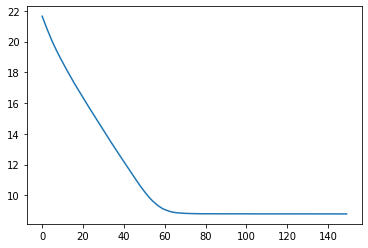

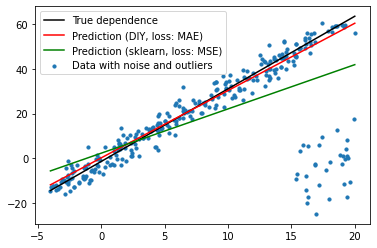

In [4]:
from tqdm import trange
from sklearn.linear_model import LinearRegression

# Initialize the model parameters with zeros
w = np.zeros((2,))

loss_values = []
learning_rate = 0.01

# Training loop
for _ in trange(150):
  gradient = (np.sign(X_expanded @ w - y) @ X_expanded)/len(X)
  w -= learning_rate * gradient
  loss_values.append(
      (abs(X_expanded @ w - y)).mean()
  )

# Training sklearn's LinearRegression
model = LinearRegression()
model.fit(X, y)

# Plotting the evolution of loss values
plt.plot(loss_values);
plt.show()


# Plotting the solution
x = np.linspace(*limits, 101)
x_expanded = expand(x[:, None])
plt.plot(x, true_function(x), c='black', label='True dependence')
plt.scatter(X, y, s=10, label='Data with noise and outliers')
plt.plot(x, x_expanded @ w, c='red', label='Prediction (DIY, loss: MAE)')
plt.plot(x, model.predict(x[:, None]), c='green', label='Prediction (sklearn, loss: MSE)')
plt.legend();

We can observe that as expected, the MSE loss is more sensitive to the outliers than the MAE